In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

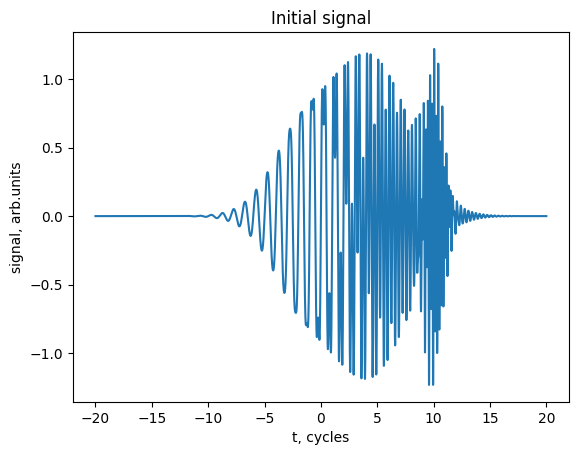

In [2]:
# generate the signal
nofts=1000
#t=np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14+5)
t=np.linspace(-20*2*np.pi, 20*2*np.pi, 3**9+6)
y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*np.pi)**2/2/5**2)

plt.plot(t/2/np.pi,y)

plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')
plt.title('Initial signal')
plt.show()

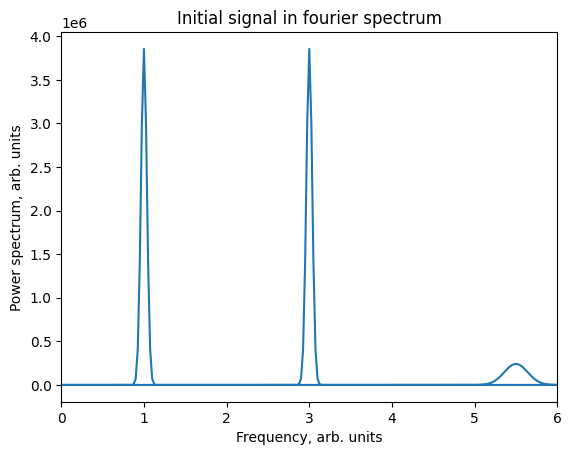

In [3]:
# Fourier spectrum
sp=np.fft.fft(y)
w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/np.pi)
plt.plot(w, abs(sp)**2)
plt.xlim(0,6)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')
plt.title('Initial signal in fourier spectrum')
plt.show()

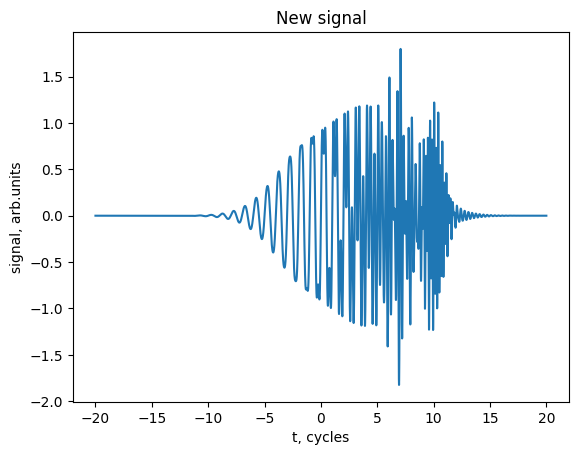

In [4]:
y_new=y+np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/5**2)

plt.plot(t/2/np.pi,y_new)

plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')
plt.title('New signal')
plt.show()

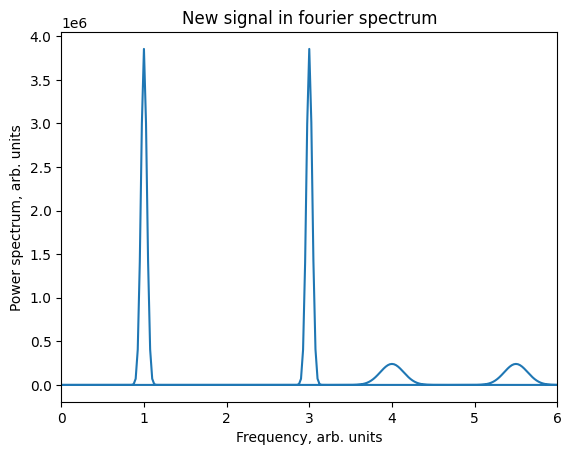

In [5]:
sp_new=np.fft.fft(y_new)
w_new=np.fft.fftfreq(len(y_new), d=(t[1]-t[0])/2/np.pi)
plt.plot(w_new, abs(sp_new)**2)
plt.xlim(0,6)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')
plt.title('New signal in fourier spectrum')
plt.show()

In [6]:
def get_window(t, shift, window_width):
    return np.exp(-(t - shift)**2 / 2 / window_width**2)

def get_specgram(window_width, ts, nwindowsteps = 1000):
    window=np.linspace(-20*2*np.pi, 20*2*np.pi, nwindowsteps)
    specgram = np.ones([len(ts), len(window)])

    for i, shift in enumerate(window):
        y_window = ts * get_window(t, shift, window_width)
        specgram[:, i] = abs(np.fft.fft(y_window))

    return specgram

In [7]:
specgram = get_specgram(2*np.pi, y)
specgram_new = get_specgram(2*np.pi, y_new)

In [8]:
def plot_spectrogram(x, y, z, grid_active=False):
    plt.figure(figsize=(10, 6))
    plt.imshow(z, aspect='auto', origin='lower', 
               extent=[min(x)/2/np.pi, max(x)/2/np.pi, y[0], 2*y[int(len(x)/2)-1]])
    cbar = plt.colorbar()
    cbar.ax.tick_params()
    plt.title("Spectrogram")
    plt.xlabel("t, cycles")
    plt.ylabel("Frequency, arb. units")
    plt.xticks()
    plt.yticks()
    plt.ylim(0, 8)
    plt.grid(grid_active)

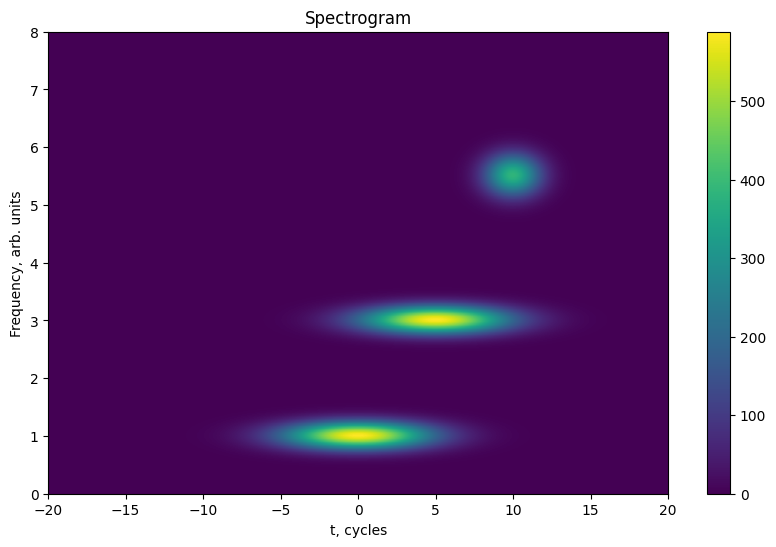

In [9]:
plot_spectrogram(t, w, specgram)
plt.show()

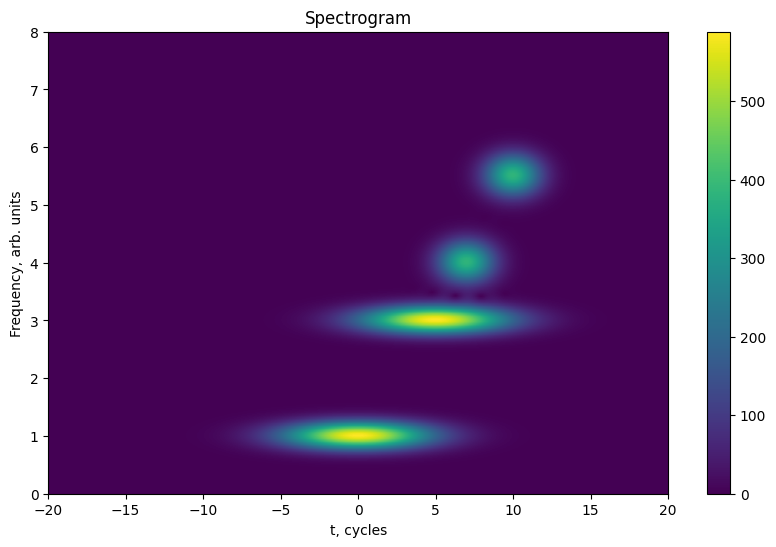

In [10]:
plot_spectrogram(t, w_new, specgram_new)
plt.show()

In [11]:
import time

In [12]:
for power in range(-5, 5):
    t=np.linspace(-20*2*np.pi, 20*2*np.pi, 2**(14+power), endpoint=True)

    y=np.sin(t)*np.exp(-t**2/2/20**2)
    y=y+np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
    y=y+np.sin(5.5*t)*np.exp(-(t-10*2*np.pi)**2/2/5**2)
    start = time.perf_counter()
    specgram = get_specgram(2*np.pi, y)
    end = time.perf_counter()
    print(f'n_timestamps={2**(14+power)}, time_spent={end-start}')

n_timestamps=512, time_spent=0.0645801829999968
n_timestamps=1024, time_spent=0.07948587900000348
n_timestamps=2048, time_spent=0.16233764900000125
n_timestamps=4096, time_spent=0.2734981869999942
n_timestamps=8192, time_spent=0.6505963310000027
n_timestamps=16384, time_spent=1.1119717409999978
n_timestamps=32768, time_spent=2.4875294720000056
n_timestamps=65536, time_spent=5.403830480999993
n_timestamps=131072, time_spent=12.69459922
n_timestamps=262144, time_spent=42.47928220600001


Assymptotic of FFT is $N\log(N)$ where N is length of input, so with increase of timestamps increases time for spectrogram calculations.